In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv('Resources/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
type_dist = data['type'].value_counts()
type_dist

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

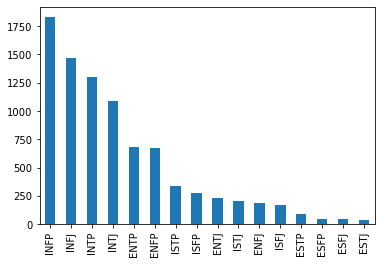

In [6]:
ax = type_dist.plot.bar()
fig = ax.get_figure()
fig.savefig('MBTI_distribution.png')

# observation 

Since our dat is heavily skewed for INFP. 

In [7]:
#create columns for individual letters 
for index, row in data.iterrows(): 
    mbti_type = list(row['type'])
    data.loc[index,'IorE']=mbti_type[0]
    data.loc[index,'SorN']=mbti_type[1]
    data.loc[index,'TorF']=mbti_type[2]
    data.loc[index,'PorJ']=mbti_type[3]

In [8]:
data.head()

,type,posts,IorE,SorN,TorF,PorJ
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


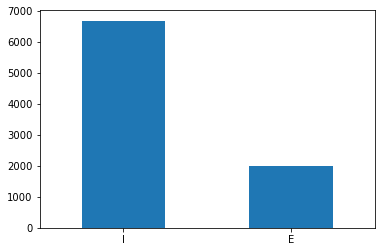

In [15]:
iore = data['IorE'].value_counts()
ax = iore.plot.bar(rot=0)
fig = ax.get_figure()
fig.savefig('IvsE.png')

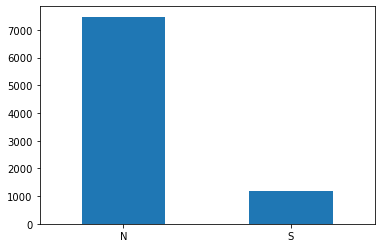

In [16]:
sorn = data['SorN'].value_counts()
ax = sorn.plot.bar(rot=0)
fig = ax.get_figure()
fig.savefig('SvsN.png')

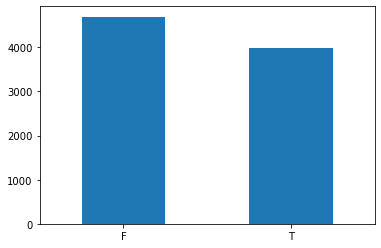

In [20]:
torf = data['TorF'].value_counts()
ax = torf.plot.bar(rot=0)
fig = ax.get_figure()
fig.savefig('TvsF.png')

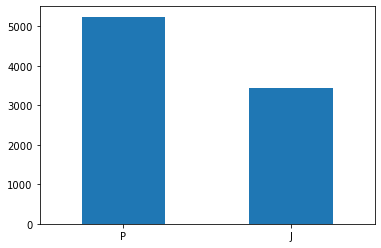

In [19]:
porj = data['PorJ'].value_counts()
ax = porj.plot.bar(rot=0)
fig = ax.get_figure()
fig.savefig('PvsJ.png')

In [21]:
unique_mbti = data['type'].unique()

In [22]:
unique_mbti #list of unique personality types 

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [23]:
#creating a function to take in personality and get a random sample set 
def randomSet(mbti, dframe): 
    personality = dframe.loc[data['type']==mbti]
    personality_index = personality.index.tolist()
    personality_RSDF = dframe.iloc[random.sample(personality_index,25)] #getting 25 random samples
    return personality_RSDF

In [24]:
#initialize DF to append to create a clean sample Data Set 
df = pd.DataFrame() 

for item in unique_mbti: 
    df = df.append(randomSet(item, data))

In [25]:
df['type'].value_counts()

INFP    25
ENFJ    25
INTJ    25
ISTJ    25
ENTJ    25
ESTJ    25
ISFJ    25
ESFJ    25
INFJ    25
ESTP    25
ESFP    25
ISTP    25
ENFP    25
INTP    25
ENTP    25
ISFP    25
Name: type, dtype: int64

In [26]:
df.to_csv('Resources/mbti_randomSample.csv')